<a href="https://colab.research.google.com/github/brianhphillips/testrepo/blob/main/LogReg_DropoutData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# Step 1: Download the dataset
path = kagglehub.dataset_download("adilshamim8/predict-students-dropout-and-academic-success")
print("Path to dataset files:", path)

100%|██████████| 104k/104k [00:00<00:00, 31.7MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/adilshamim8/predict-students-dropout-and-academic-success/versions/1


In [3]:
# Step 2: Load the dataset
data_path = os.path.join(path, "students_dropout_academic_success.csv")  # Adjust filename if needed
df = pd.read_csv(data_path)

In [5]:
# Step 3: Explore the target variable
print("Target value counts:\n", df['target'].value_counts())

Target value counts:
 target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64


In [6]:
# Step 4: Encode categorical features
categorical_cols = df.select_dtypes(include='object').columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

In [7]:
# Step 5: Split features and target
X = df.drop('target', axis=1)
y = df['target']

In [8]:
# Step 6: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [9]:
# Step 7: Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
# Step 8: Train logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [11]:
# Step 9: Evaluate the model
y_pred = model.predict(X_test_scaled)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[218  29  37]
 [ 43  53  63]
 [ 14  19 409]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.77      0.78       284
           1       0.52      0.33      0.41       159
           2       0.80      0.93      0.86       442

    accuracy                           0.77       885
   macro avg       0.71      0.68      0.68       885
weighted avg       0.75      0.77      0.75       885



<ipython-input-12-8d406af32cfa>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance.values, y=importance.index, palette="viridis")


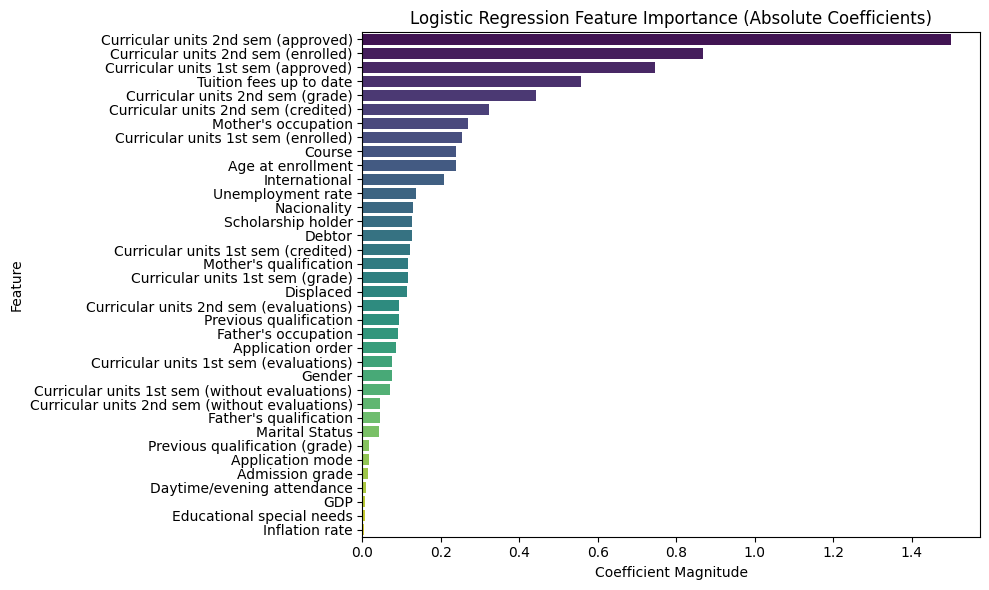

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Step 10: Visualize feature importance
feature_names = X.columns
coefs = model.coef_[0]  # For binary or multinomial classification
importance = pd.Series(np.abs(coefs), index=feature_names).sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=importance.values, y=importance.index, palette="viridis")
plt.title("Logistic Regression Feature Importance (Absolute Coefficients)")
plt.xlabel("Coefficient Magnitude")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()